In [112]:
import pandas as pd
import os
import numpy as np
%load_ext autoreload
%autoreload 2
import pipeline as pipeline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11, 4)})

## Reading the Data

In [5]:
def read_data():
    claims_datas = [f"claims_{i}" for i in range(1, 6)]
    claims = pd.read_csv("Data/claims1.csv")
    for i in range(2, 6):
        claims = claims.append(pd.read_csv(f"Data/claims{i}.csv"))
    return claims

In [6]:
claims = read_data()

## Data Preperation

In [7]:
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])
claims["log(reimb2009+1)"] = np.array(claims["reimb2009"]) + 1
claims["log(reimb2009+1)"] = np.log10(claims["log(reimb2009+1)"])
claims["log(reimb2008+1)"] = np.array(claims["reimb2008"]) + 1
claims["log(reimb2008+1)"] = np.log10(claims["log(reimb2008+1)"])

In [8]:
claims["race"] = claims["race"].str.replace("Block", "Black")

In [9]:
claims = claims.drop(columns = ["Unnamed: 0"])

In [10]:
claims = pipeline.onehot(claims, ["race"])

In [11]:
train, test = pipeline.train_test(claims, 0.2, random_ = 5597)

In [12]:
pipeline.fill_all_missing(claims)

In [13]:
cols_norm = ["reimb2010", "reimb2008", "reimb2009", 
             "acuity", "costTrend", "monthsWithClaims", 
             "log(reimb2009+1)", "log(reimb2010+1)", "log(reimb2008+1)"]

In [14]:
train_n, test_n = pipeline.normalize(train, test, cols_norm)

In [16]:
train_n

,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,...,acuity,costTrend,monthsWithClaims,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1),race_Black,race_Hispanic,race_Other,race_White
94448,-0.459035,-0.245118,-0.352705,72,1,1,0,0,0,0,...,-0.867864,-0.166693,0.930400,-0.489012,0.243788,0.434929,0,0,0,1
82322,-0.477486,-0.413575,-0.510077,28,0,0,0,0,0,0,...,0.369275,-0.506059,-1.051994,-2.126832,-0.311882,-0.152792,0,0,0,1
15975,-0.477486,-0.445160,-0.524587,83,0,0,0,0,0,0,...,-0.220050,2.165657,-1.299793,-2.126832,-0.471269,-2.002770,0,0,0,1
147,-0.455680,-0.442289,-0.540212,89,0,0,0,0,0,0,...,0.307241,0.591755,-1.423693,-0.431398,-0.817075,-0.907859,0,1,0,0
58640,-0.002797,-0.296804,0.424113,80,1,1,0,1,1,1,...,0.104608,0.626570,0.682600,0.637355,0.794980,0.339676,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171339,-0.093374,-0.361889,-0.469897,54,1,1,0,0,0,0,...,-0.765140,-0.408040,0.187002,0.563753,-0.068686,0.155698,0,0,0,1
190255,-0.249367,-0.424103,1.126150,72,0,1,0,0,0,0,...,1.344974,0.738402,-0.184697,0.382647,0.982075,-0.281591,0,0,0,1
64558,-0.477486,-0.445160,-0.549141,70,0,0,0,0,0,0,...,-1.289279,-0.389145,-1.795391,-2.126832,-2.331081,-2.002770,1,0,0,0
19664,-0.163822,-0.015405,-0.199797,68,0,1,0,0,0,0,...,-0.405040,-1.434122,0.806500,0.493325,0.442053,0.678665,0,0,0,1


In [91]:
train_features = train_n.loc[:,'age2010':'race_White'].drop(columns = ["log(reimb2010+1)"])
train_targets = train.loc[:,'reimb2010']
test_features = test_n.loc[:,'age2010':'race_White'].drop(columns = ["log(reimb2010+1)"])
test_targets = test.loc[:,'reimb2010']

In [92]:
train_features

,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,...,Ambulance,acuity,costTrend,monthsWithClaims,log(reimb2009+1),log(reimb2008+1),race_Black,race_Hispanic,race_Other,race_White
94448,72,1,1,0,0,0,0,1,1,1,...,0,-0.867864,-0.166693,0.930400,0.243788,0.434929,0,0,0,1
82322,28,0,0,0,0,0,0,0,0,0,...,1,0.369275,-0.506059,-1.051994,-0.311882,-0.152792,0,0,0,1
15975,83,0,0,0,0,0,0,1,0,0,...,0,-0.220050,2.165657,-1.299793,-0.471269,-2.002770,0,0,0,1
147,89,0,0,0,0,0,0,0,0,0,...,0,0.307241,0.591755,-1.423693,-0.817075,-0.907859,0,1,0,0
58640,80,1,1,0,1,1,1,1,1,1,...,2,0.104608,0.626570,0.682600,0.794980,0.339676,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171339,54,1,1,0,0,0,0,0,1,1,...,0,-0.765140,-0.408040,0.187002,-0.068686,0.155698,0,0,0,1
190255,72,0,1,0,0,0,0,1,0,0,...,1,1.344974,0.738402,-0.184697,0.982075,-0.281591,0,0,0,1
64558,70,0,0,0,0,0,0,0,0,0,...,0,-1.289279,-0.389145,-1.795391,-2.331081,-2.002770,1,0,0,0
19664,68,0,1,0,0,0,0,1,1,1,...,1,-0.405040,-1.434122,0.806500,0.442053,0.678665,0,0,0,1


In [110]:
ev = {}

## Lasso Regression

In [93]:
def metrics(target_predict,test_targets,train_features,train_targets,regr,output=True):
    
    bias = mean_squared_error(regr.predict(train_features),train_targets)
    mse = mean_squared_error(target_predict,test_targets)
    rss = np.sum((target_predict - test_targets) ** 2)
    variance = regr.score(train_features, train_targets)
    
    if output:
        print("Bias: %.2f" % bias)   
        print("Mean squared error: %.2f" % mse)
        print("RSS: %.2f" % rss)
        print('Variance score: %.2f\n' % variance)
    
    return(bias,mse,rss,variance)

In [94]:
print(list(train_features), '\n\n')
ls = linear_model.Lasso(alpha=0.5)
ls.fit(train_features,train_targets)
target_predict = ls.predict(test_features)
print('{}\n'.format(ls.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+1)', 'log(reimb2008+1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[   2.39198223   20.92344874  146.57494918  365.88048101   70.47480126
  138.70415026  -44.05221105  158.60810955   94.3276061  -128.04203973
  -11.30137746 -112.11449666 -289.80024484   65.79916757   28.14552083
  -27.1679324    64.3745798    61.47210865   62.33634082    2.01375781
  248.73939753 -340.50260429  266.40101924  -97.28045032  409.79665707
  442.2311132     2.90011232   -0.          -38.29480717    0.        ]



In [116]:
ev["Lasso"] = metrics(target_predict,test_targets,train_features,train_targets,ls)

Bias: 31536089.58
Mean squared error: 31575086.92
RSS: 6466262050042.48
Variance score: 0.11



In [95]:
coefs = ls.coef_

In [96]:
train_features_cols = list(train_features)

In [97]:
coef_results = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs)), orient = "index", columns = ["Coef"]).reset_index()

In [98]:
coef_results.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

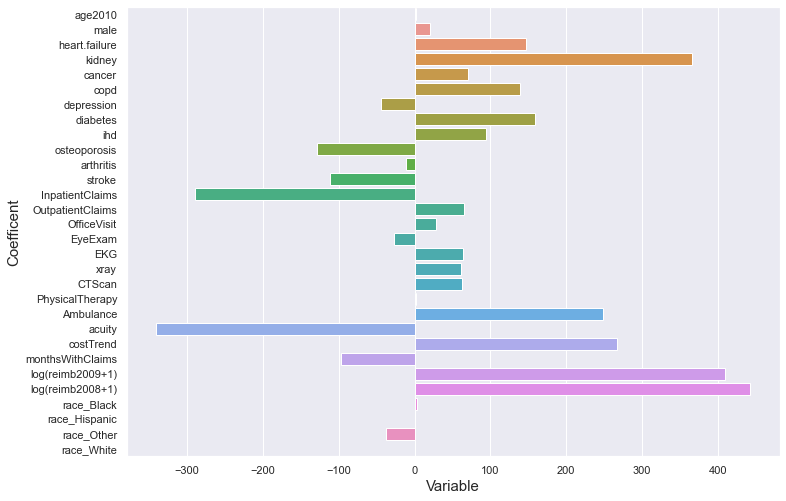

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

## Ridge Regression

In [100]:
print(list(train_features), '\n\n')
rg = linear_model.Ridge(alpha=0.5)
rg.fit(train_features,train_targets)
target_predict = rg.predict(test_features)
print('{}\n'.format(rg.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+1)', 'log(reimb2008+1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[   2.41699595   22.97139057  149.33797342  369.45181586   75.38041224
  142.65630787  -46.72310478  163.34968314   98.29330829 -130.36468362
  -14.14656695 -119.05519504 -291.98333204   65.82977568   28.22881617
  -27.31191675   64.55951635   61.61674952   62.66262688    2.20501518
  248.73305891 -343.15289106  266.7496925  -112.52704519  415.14092675
  448.27955224   20.18642333    6.73413333  -39.21260846   12.29205038]



In [101]:
coefs_r = rg.coef_

In [102]:
coef_results_r = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_r)), orient = "index", columns = ["Coef"]).reset_index()

In [105]:
coef_results_r.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

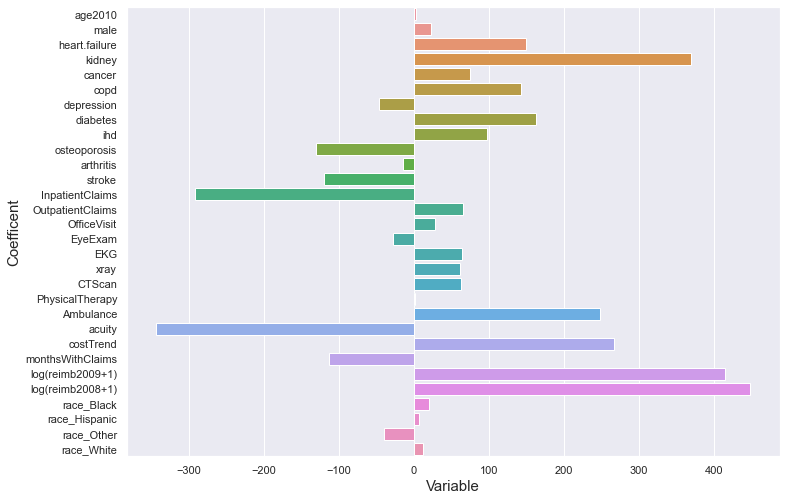

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_r)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

In [115]:
ev["Ridge"] = metrics(target_predict,test_targets,train_features,train_targets,rg)

Bias: 31536043.06
Mean squared error: 31575086.92
RSS: 6466262050042.48
Variance score: 0.11



## Elastic Net

In [119]:
print(list(train_features), '\n\n')
en = linear_model.ElasticNet(alpha=0.5)
en.fit(train_features,train_targets)
target_predict = en.predict(test_features)
print('{}\n'.format(en.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+1)', 'log(reimb2008+1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[   2.1920624    11.84169503   87.30352456  125.01850132   19.3849302
   46.54794833   -2.6377626    90.32983576   83.14594472  -42.26344622
  -10.06255869  -25.94139853 -179.1810534    74.41098436   39.42573434
  -13.70493868   61.6148441    59.86077244   52.93870751    0.86167839
  240.22438664 -216.76741908  216.85563305  155.02112103  242.00225495
  227.42913286    1.82945467   -0.34798022   -6.19277588    4.71132486]



In [120]:
coefs_en = en.coef_

In [121]:
coef_results_en = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_en)), orient = "index", columns = ["Coef"]).reset_index()

In [122]:
coef_results_en.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

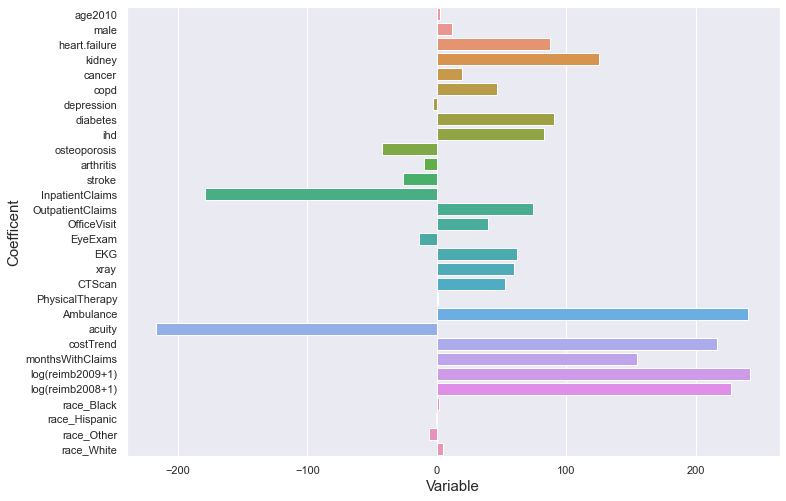

In [123]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_en)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

In [124]:
ev["Elastic Net"] = metrics(target_predict,test_targets,train_features,train_targets,en)

Bias: 31578142.15
Mean squared error: 31603370.69
RSS: 6472054283807.67
Variance score: 0.11



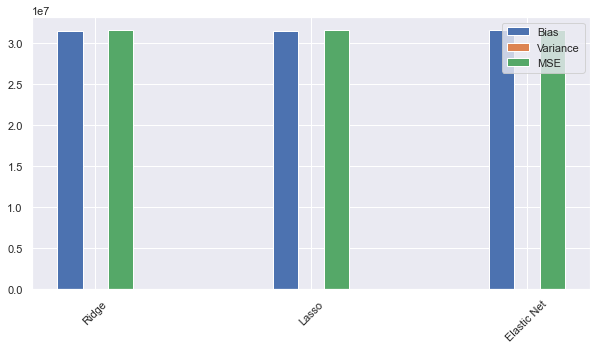

In [125]:
plt.rcParams['figure.figsize'] = [10, 5]

mdf = pd.DataFrame(
    ev
).transpose()

mdf.index.name = 'Type'
mdf.rename(columns={0:'Bias',1:'MSE',2:'RSS',3:'Variance'},inplace=True)
mdf.sort_values(by=['Bias'],inplace=True)

labels = mdf.index.values
x = np.arange(len(labels))
width = 0.35  

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, mdf['Bias'], width/3, label='Bias')
rects = ax.bar(x, mdf['Variance'], width/3, label='Variance')
rects = ax.bar(x + width/3, mdf['MSE'], width/3, label='MSE')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()